In [28]:
import cudf as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [29]:
data = pd.read_csv('data/all_data_groupped.csv', index_col=0)

In [30]:
def check_if_conversion(df:pd.DataFrame):
    if df['conversion_total'] > 0:
        return 1
    else:
        return 0

In [31]:
data['conversion_total'] = data[['campaign_type_conversion','event_type_conversion']].sum(axis=1)

In [32]:
data.fillna(0.0, inplace=True)

In [33]:
data['touches_total'] = data[['campaign_type_click', 'campaign_type_show', 'event_type_click', 'event_type_show']].sum(axis=1)

In [34]:
data['true_if_conversion'] = data.apply(check_if_conversion, axis=1)

In [35]:
data_with_conversions = data.loc[data['true_if_conversion'] == 1]['touches_total']

In [36]:
data_with_conversions.describe()

count    382745.000000
mean          3.355192
std           1.699673
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max         971.000000
Name: touches_total, dtype: float64

In [37]:
data_without_conversions = data.loc[data['true_if_conversion'] == 0]['touches_total']

In [38]:
data_without_conversions.describe()

count    6.997953e+06
mean     2.554206e+00
std      6.967770e-01
min      2.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.000000e+01
Name: touches_total, dtype: float64

In [39]:
data.loc[data['campaign_cost'] > 0]['campaign_cost'].describe()

count    462107.000000
mean        516.625711
std        1139.200717
min          30.739400
25%         179.970000
50%         203.990000
75%         235.480000
max       36279.910700
Name: campaign_cost, dtype: float64

In [40]:
data.head()

,user_phone,campaign_cost,campaign_type_click,campaign_type_conversion,campaign_type_show,source_medium_android / mobile_app,source_medium_bing / organic,source_medium_email / email,source_medium_finance.rambler.ru / cpm,source_medium_google / organic,...,product_type_loan,product_type_mortgage,event_status_approve,event_status_deal,event_status_payout,event_status_reject,event_status_sale,conversion_total,touches_total,true_if_conversion
0,79115743201,0.0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,2,0
1,79115746314,0.0,0,0,1,0,0,0,0,0,...,2,0,0,0,0,0,0,0,3,0
2,79122056776,0.0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,0
3,79123255057,0.0,0,0,1,0,0,0,0,0,...,2,0,0,0,0,0,0,0,3,0
4,79110846323,0.0,0,0,2,1,0,0,0,1,...,2,0,0,0,0,0,0,0,4,0


In [46]:
corr_matrix = data[[
    'interface_api', 'interface_app',
       'interface_web', 'payout', 'event_type_click', 'event_type_conversion',
       'event_type_show', 'product_type_deposits', 'product_type_loan',
       'product_type_mortgage', 'event_status_approve', 'event_status_deal',
       'event_status_payout', 'event_status_reject', 'event_status_sale',
       'conversion_total', 'touches_total', 'true_if_conversion'
    ]].corr().to_numpy()

In [47]:
corr_matrix_val = data[[
    'interface_api', 'interface_app',
       'interface_web', 'payout', 'event_type_click', 'event_type_conversion',
       'event_type_show', 'product_type_deposits', 'product_type_loan',
       'product_type_mortgage', 'event_status_approve', 'event_status_deal',
       'event_status_payout', 'event_status_reject', 'event_status_sale',
       'conversion_total', 'touches_total', 'true_if_conversion'
    ]].corr().columns.values

<Axes: >

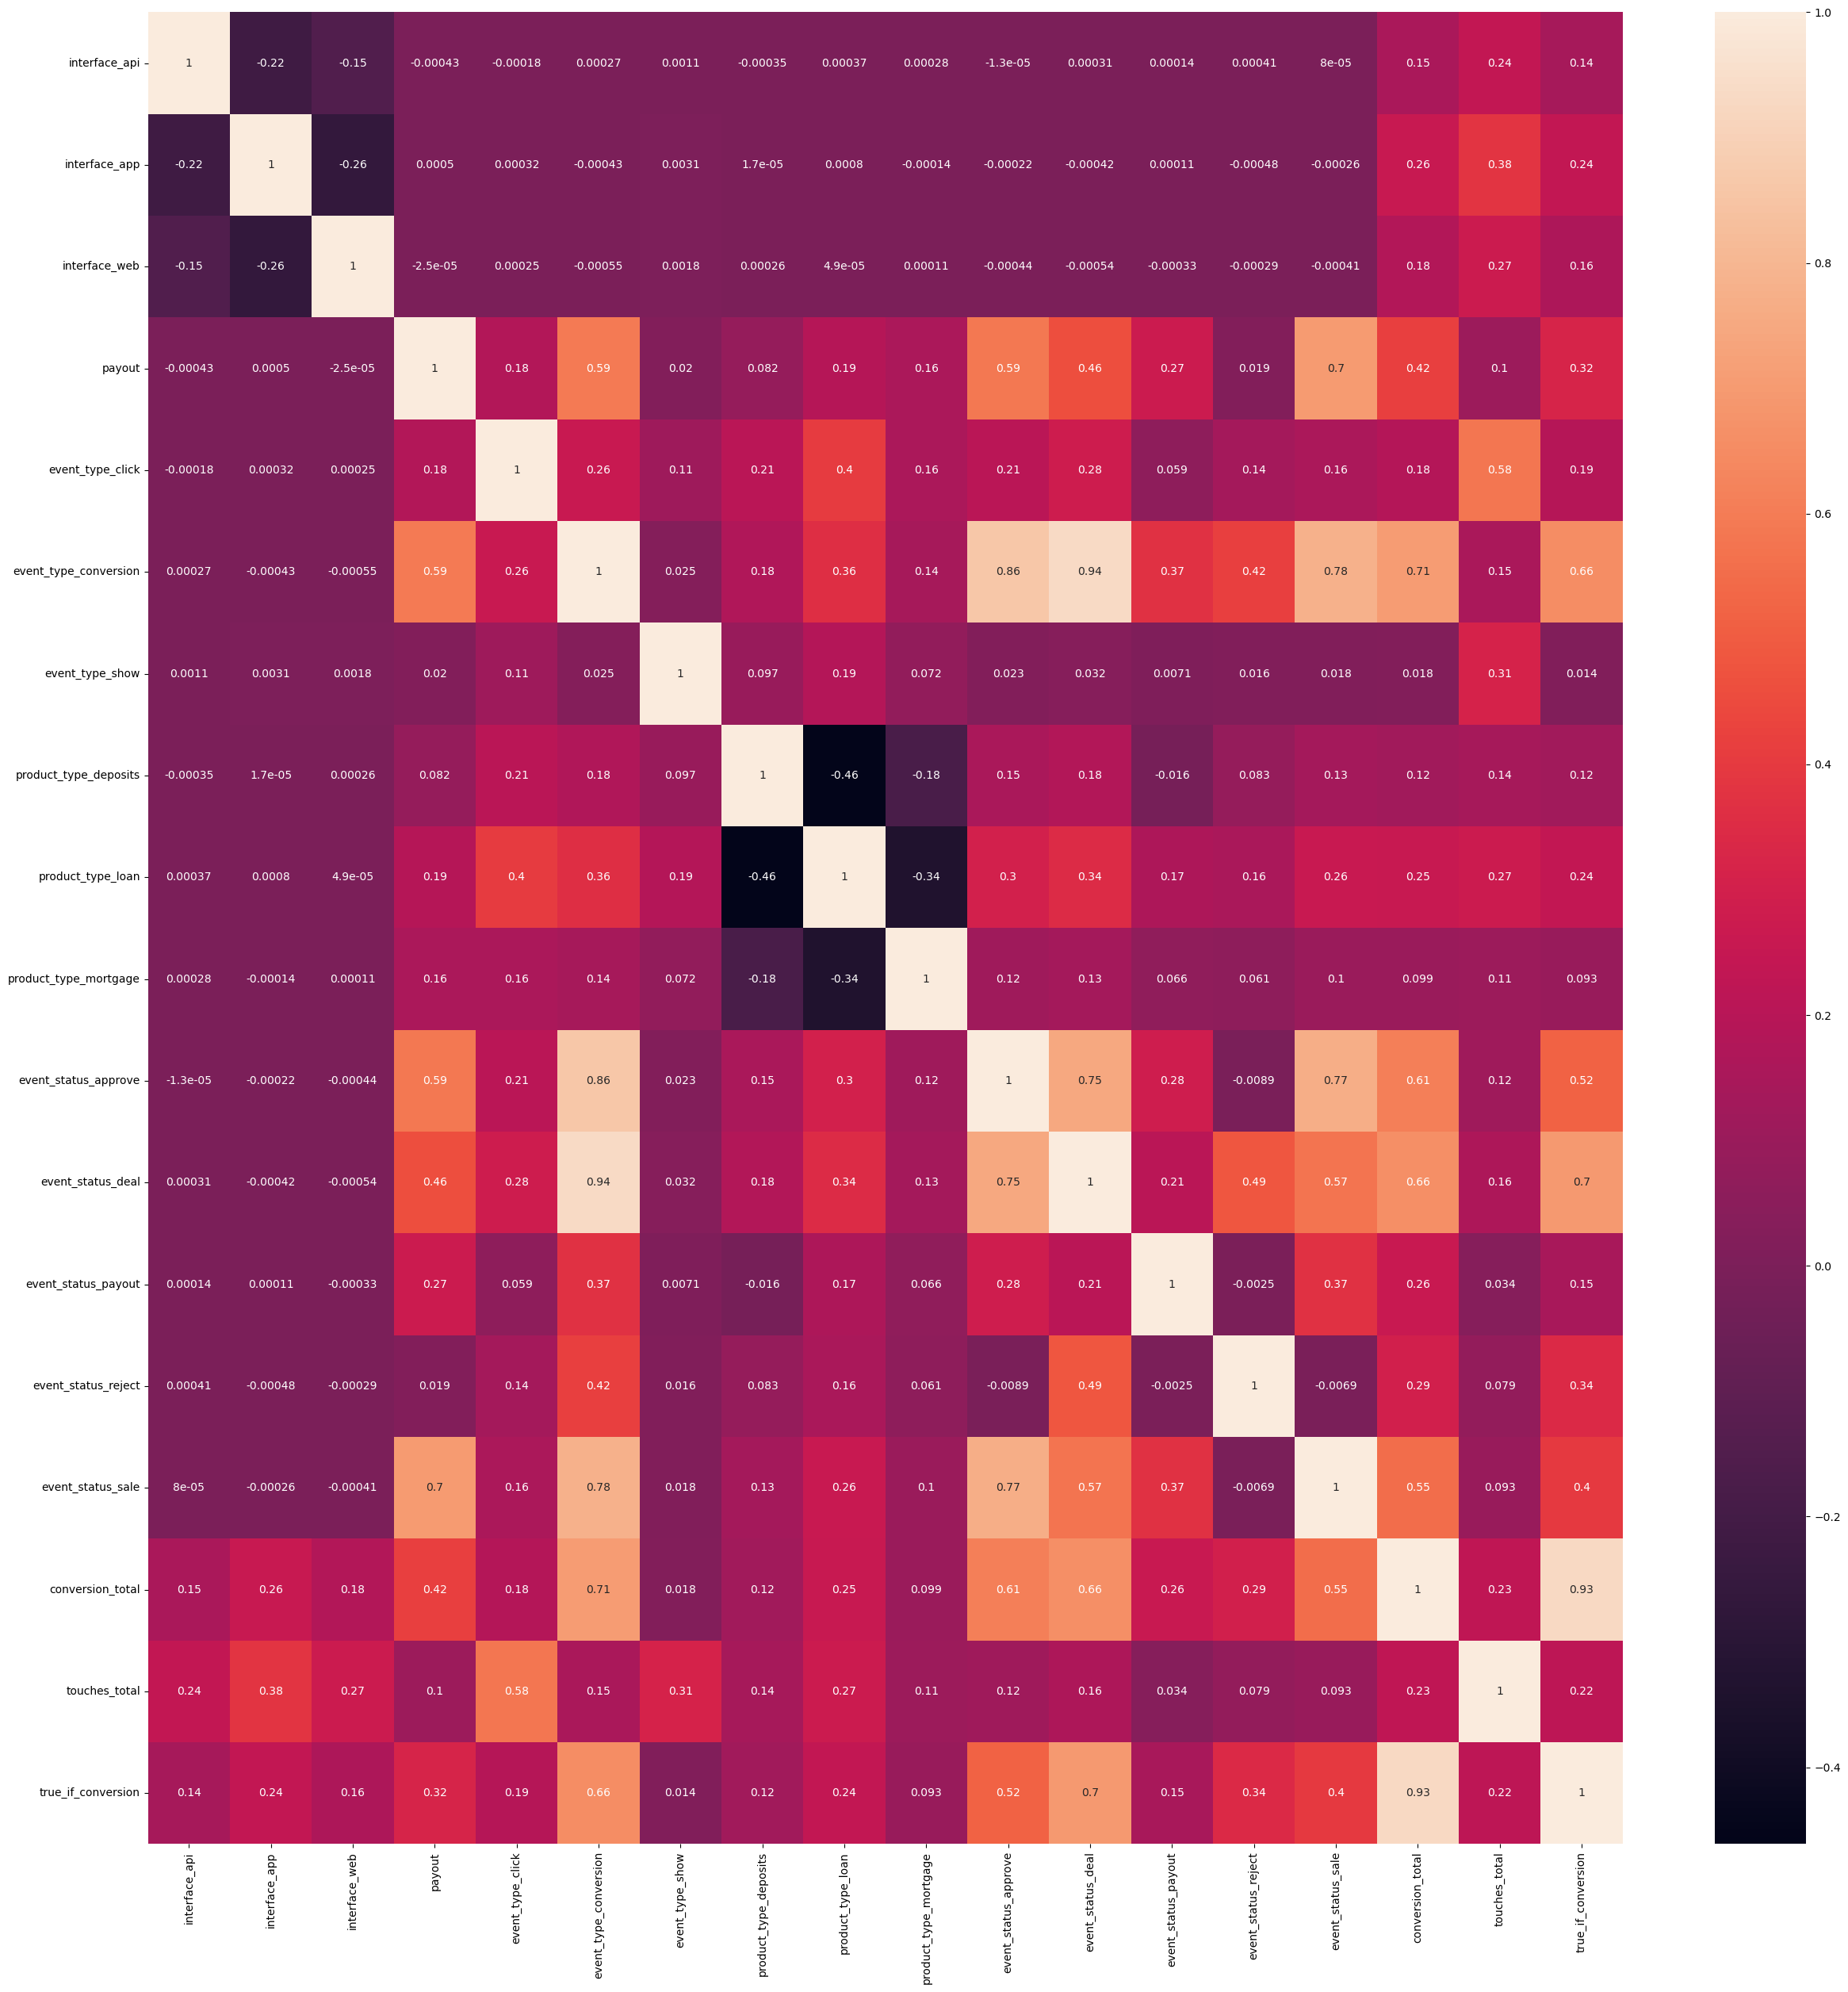

In [48]:
plt.figure(figsize=(30,30))

sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix_val, 
            yticklabels=corr_matrix_val,
            annot=True
            )

In [18]:
data_for_regression = data.copy()

In [19]:
data_for_regression.drop(['payout', 'user_phone', 'campaign_type_conversion', 'event_type_conversion', 'conversion_total', 'touches_total', 'event_status_approve', 'event_status_deal', 'event_status_payout', 'event_status_reject', 'event_status_sale'], axis=1, inplace=True)

In [20]:
data_for_regression.head()

,campaign_cost,campaign_type_click,campaign_type_show,source_medium_android / mobile_app,source_medium_bing / organic,source_medium_email / email,source_medium_finance.rambler.ru / cpm,source_medium_google / organic,source_medium_ios / mobile_app,source_medium_not-set / none,...,source_medium_zen.yandex.ru / cpm,interface_api,interface_app,interface_web,event_type_click,event_type_show,product_type_deposits,product_type_loan,product_type_mortgage,true_if_conversion
0,0.0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,2,0,0
2,0.0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
3,0.0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,1,0,2,0,0
4,0.0,0,2,1,0,0,0,1,0,0,...,0,0,1,1,1,1,0,2,0,0


In [21]:
X = data_for_regression.drop('true_if_conversion', axis=1).to_numpy()

In [22]:
X

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 2., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 2., 0.]])

In [23]:
y = data_for_regression['true_if_conversion'].to_numpy()

In [24]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
model1 = RandomForestRegressor(n_estimators=5, criterion='squared_error', min_samples_split=2, min_samples_leaf=1, random_state=42, verbose=1, n_jobs=-1)

In [27]:
model1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


RandomForestRegressor(n_estimators=5, n_jobs=-1, random_state=42, verbose=1)

In [28]:
pred1 = model1.predict(X_test)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.2s finished


In [28]:
compare_pred = pd.DataFrame(
    {
        'y_test': y_test,
        'prediction': pred2.astype('int')
    }
)

In [30]:
model1.score(X_test, y_test)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.2s finished


0.9986259316653563

In [31]:
def iftrue(df:pd.DataFrame):
    if df['y_test'] == df['prediction']:
        return True
    else:
        return False

In [32]:
compare_pred['if_true'] = compare_pred.apply(iftrue, axis=1)

In [39]:
compare_pred.sample(20)

,y_test,prediction,if_true
1050955,0,0,True
714327,0,0,True
1818144,0,0,True
1224091,0,0,True
252934,0,0,True
1680157,0,0,True
680165,0,0,True
1277171,0,0,True
493478,0,0,True
653091,0,0,True


In [41]:
# with open('model.pkl', 'wb') as f:
#     pickle.dump(model1, f)